# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [10]:
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, RMSprop

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = tf.keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = tf.keras.utils.to_categorical(y, num_classes)
    return y    

In [13]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [18]:
def build_mlp(input_shape, num_neurons=[512,256,128], output_unit=10):
    input_layer=Input(input_shape)
    for i,n_unit in enumerate(num_neurons):
        if i==0:
            x=Dense(units=n_unit, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x=Dense(units=n_unit, activation='relu', name='hidden_layer'+str(i+1))(x)
    output_layer=Dense(units=output_unit, activation='softmax', name='output_layer')(x)
    model=Model(inputs=[input_layer], outputs=[output_layer])
    return model

In [15]:
## 超參數設定
lr=[0.01,0.001]
e=50
batch=256
opt=['SGD','RMSprop']

In [25]:
results = {}
for l in lr:
    for o in opt:
        tf.keras.backend.clear_session()
        print(f"Experiment with learning rate {l} and {o} optimizer")
        model=build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        if o=='SGD':
            sgd=SGD(lr=l, nesterov=True, momentum=0.95)
            model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=sgd)
        if o=='RMSprop':
            rms=RMSprop(lr=l)
            model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=rms)
        model.fit(x_train, y_train, epochs=e, batch_size=batch, validation_data=(x_test, y_test), shuffle=True)
    
    # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = f"lr-{l}-opt-{o}"
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with learning rate 0.01 and SGD optimizer
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====

Epoch 1/50
50000/50000 [==============================] - 6s 121us/sample - loss: 14.4456 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 6s 120us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 156us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 9s 181us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 9s 176us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 122us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 127us/sample - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 

Epoch 1/50
50000/50000 [==============================] - 6s 111us/sample - loss: 2.0533 - acc: 0.2610 - val_loss: 1.8809 - val_acc: 0.3356
Epoch 2/50
50000/50000 [==============================] - 5s 106us/sample - loss: 1.8214 - acc: 0.3609 - val_loss: 1.7791 - val_acc: 0.3751
Epoch 3/50
50000/50000 [==============================] - 5s 106us/sample - loss: 1.7375 - acc: 0.3950 - val_loss: 1.7109 - val_acc: 0.4028
Epoch 4/50
50000/50000 [==============================] - 5s 104us/sample - loss: 1.6793 - acc: 0.4138 - val_loss: 1.6812 - val_acc: 0.4033
Epoch 5/50
50000/50000 [==============================] - 5s 105us/sample - loss: 1.6334 - acc: 0.4308 - val_loss: 1.6244 - val_acc: 0.4295
Epoch 6/50
50000/50000 [==============================] - 5s 104us/sample - loss: 1.5904 - acc: 0.4442 - val_loss: 1.5856 - val_acc: 0.4380
Epoch 7/50
50000/50000 [==============================] - 5s 105us/sample - loss: 1.5567 - acc: 0.4553 - val_loss: 1.5532 - val_acc: 0.4518
Epoch 8/50
50000/500

50000/50000 [==============================] - 6s 125us/sample - loss: 2.2777 - acc: 0.2184 - val_loss: 2.0391 - val_acc: 0.2382
Epoch 2/50
50000/50000 [==============================] - 6s 116us/sample - loss: 1.8826 - acc: 0.3205 - val_loss: 1.9094 - val_acc: 0.3132
Epoch 3/50
50000/50000 [==============================] - 6s 116us/sample - loss: 1.7855 - acc: 0.3559 - val_loss: 1.7369 - val_acc: 0.3773
Epoch 4/50
50000/50000 [==============================] - 6s 115us/sample - loss: 1.7141 - acc: 0.3866 - val_loss: 1.8682 - val_acc: 0.3386
Epoch 5/50
50000/50000 [==============================] - 7s 131us/sample - loss: 1.6583 - acc: 0.4087 - val_loss: 1.7461 - val_acc: 0.3750
Epoch 6/50
50000/50000 [==============================] - 7s 134us/sample - loss: 1.6141 - acc: 0.4240 - val_loss: 1.7137 - val_acc: 0.3749
Epoch 7/50
50000/50000 [==============================] - 6s 119us/sample - loss: 1.5705 - acc: 0.4394 - val_loss: 1.6540 - val_acc: 0.4072
Epoch 8/50
50000/50000 [=======

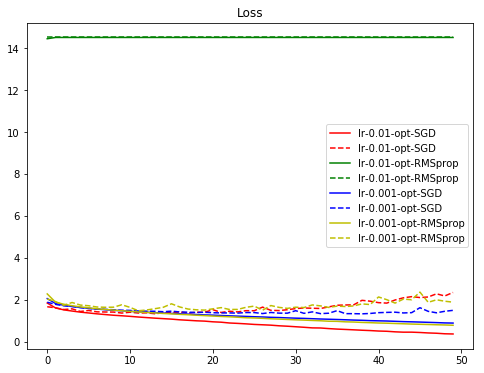

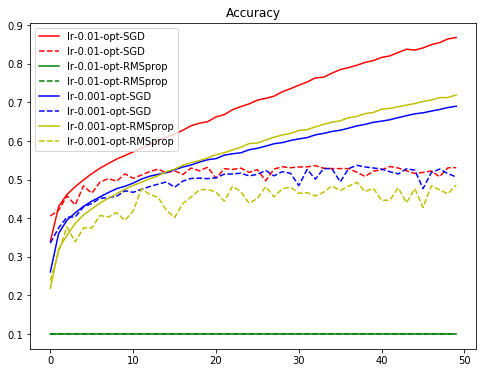

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()